# Name-Disha Sharma
__Here I have a simple linear regression model involving two variables.
In this task I will predict the percentage of marks that students are expected to score based upon the number of hours they studied.__


# Importing all necessary libraries

In [86]:

import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
import statsmodels.api as s
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split




# Importing data

In [70]:

data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting data points on a 2-D graph to visualize the data and find a relationship between the data.



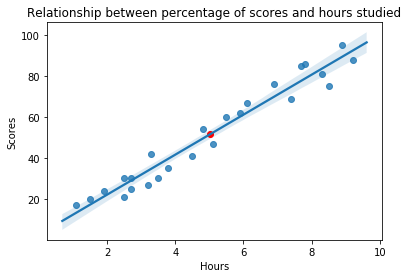

In [72]:
x=data['Hours']
y=data['Scores']
plt.figure()
plt.title('Relationship between percentage of scores and hours studied')
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y), color="red")



__From the graph above, we can see that there is a positive linear relationship between the hours studied and percentage of scores__


#  We can also carry out OLS regression to find the accuracy of this regression relationship(or other important results)

In [85]:
x=s.add_constant(x)
model1=s.OLS(y,x)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           9.13e-17
Time:                        16:16:30   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

__Value of R squared,known as coefficient of determination is 0.953, which is very close to 1. This means that 95.3% of variability in the percentage of scores can be truly explained by the linear relationship between the number of study hours and percentage of score obtained. Therefore this model would be 95.3% accurate.__ 

# Preparing the data

__Forming attributes and labels__

In [74]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

__We have attributes and labels. Next step is to split this data into training and test sets__

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

__Splitting the dataset into training set and testing set__

In [76]:
  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training successful!")

Training successful!


# Visualising training dataset results

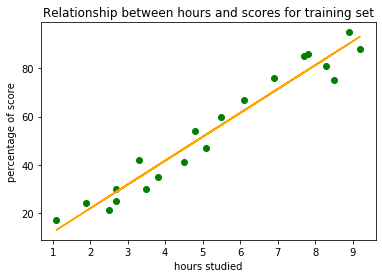

In [77]:
plt.scatter(x_train,y_train, color='green')
plt.plot(x_train,regressor.predict(x_train),color='orange')
plt.title('Relationship between hours and scores for training set')
plt.xlabel('hours studied')
plt.ylabel('percentage of score')
plt.show()

# Predicting testing dataset results

In [78]:
y_pred=regressor.predict(x_test)
print(y_test,'\n', y_pred)

[20 27 69 30 62] 
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Visualising testing dataset results

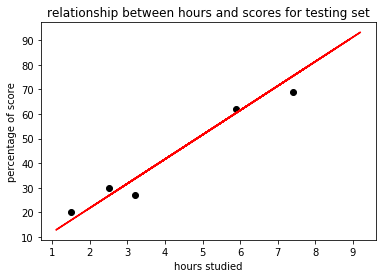

In [79]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_train,regressor.predict(x_train), color='red')
plt.title('relationship between hours and scores for testing set')
plt.xlabel('hours studied')
plt.ylabel('percentage of score')
plt.show()

# What will be the predicted score if a student studies for 9.25 hours a day?

In [80]:
a=regressor.predict([[9.25]])
print('The predicted score if a student studies for 9.25 hours a day would be',a)


The predicted score if a student studies for 9.25 hours a day would be [93.69173249]


# Evaluating the model

In [81]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()
print('Mean Squared error is', MSE)

Mean Squared error is 21.5987693072174


__MSE determines the extent to which the model fits the data as well as whether removing some explanatory variables is possible without significantly harming the model's predictive ability.Mean square error is always positive and a value closer to 0 or a lower value is better.__

In [82]:
MAS= mean_absolute_error(y_test, y_pred)
print('Mean absolute error is',MAS)

Mean absolute error is 4.183859899002975


__Mean absolute error is the sum of absolute/positive errors of all values.It doesn’t account for the direction of the value. Even if value is negative, positive value is used for calculation.__

   # THE END